##Data parsing
The following script will be for parsing in data from Reddit through "praw"


In [0]:
#! python3
#!pip install praw
import praw
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
import matplotlib.pyplot as plt

reddit = praw.Reddit(client_id='biHuZNftcyXJNw',
                     client_secret='NBRuoUNvSSuRp60IqlKZon7l474',
                     user_agent='Learning Curve',
                     username='UltimateFox69',
                     password='ABCD1234')

subreddit = reddit.subreddit('india')

topics_dict = { "title":[], \
                "score":[], \
                "flair":[], \
                "num_comments":[]}

for submission in subreddit.top("year",limit=250):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["num_comments"].append(submission.num_comments)

topics_data = pd.DataFrame(topics_dict)

#topics_data.to_csv("Required_data.csv", index=False)

##Data Cleaning and Processing
Storing data into different dictionaries so to be able to plot different aspects of data.
Calculating 

In [8]:
import re 
pd.set_option('mode.chained_assignment', None)
posts = pd.read_csv("Required_data.csv")
flair_list = list(posts["flair"])
commentsNum = list(posts["num_comments"])
upvotes_num = list(posts["score"])
flair_dict = {}
flair_comments_per_post = {}
flair_upvotes_per_post = {}
data_politics_comments = []
data_politics_upvotes = []
data_nonpolitics_comments = []
data_nonpolitics_upvotes = []

for x in range(len(flair_list)):

  if re.search("Non-Politic.+",flair_list[x]) or flair_list[x] == 'AskIndia' or flair_list[x] == "Unverified":
    flair_list[x] = "Non-Politics"
    data_nonpolitics_comments.append(commentsNum[x])
    data_nonpolitics_upvotes.append(upvotes_num[x])
  elif re.search("Poli.+",flair_list[x]) or flair_list[x] == "Demonetization" or flair_list[x] == "CAA-NRC" or flair_list[x] == '[R]eddiquette':
    flair_list[x] = "Politics"
    data_politics_comments.append(commentsNum[x])
    data_politics_upvotes.append(upvotes_num[x])
  elif flair_list[x] == 'Zoke Tyme' or flair_list[x] == 'Photography' or flair_list[x] == "Sports" or flair_list[x] == 'Official Sadness Thread' or flair_list[x] == "Food":
    flair_list[x] = "Leisure"
  elif flair_list[x] == "Science/Technology" or flair_list[x] == "Business/Finance":
    flair_list[x] = "Educational"  
      
  if commentsNum[x] == None:
    commentsNum[x] = 0
  if upvotes_num[x] is None:
    upvotes_num[x] = 0
  if flair_list[x] == None:
    flair_list[x] = "None"

  if flair_list[x] not in flair_dict:
    flair_dict[flair_list[x]] = [commentsNum[x],1,upvotes_num[x],0,0]
  else:
    flair_dict[flair_list[x]][1] += 1
    flair_dict[flair_list[x]][0] += int(commentsNum[x])
  flair_dict[flair_list[x]][3] = flair_dict[flair_list[x]][0]/flair_dict[flair_list[x]][1]
  flair_dict[flair_list[x]][4] = flair_dict[flair_list[x]][2]/flair_dict[flair_list[x]][1]
  flair_comments_per_post[flair_list[x]] = flair_dict[flair_list[x]][3]
  flair_upvotes_per_post[flair_list[x]] = flair_dict[flair_list[x]][4]

# print(i)
print(flair_dict)
np_flair = np.array(list(flair_comments_per_post.keys()))
np_comments_per_post = np.array(list(flair_comments_per_post.values()))
np_upvotes_per_post = np.array(list(flair_upvotes_per_post.values()))
print(np_flair)
# print(np_comments_per_post)

{'Politics': [35725, 100, 17990, 357.25, 179.9], 'Coronavirus': [6282, 24, 11109, 261.75, 462.875], 'Non-Politics': [19522, 93, 10715, 209.91397849462365, 115.21505376344086], 'Leisure': [4328, 25, 4835, 173.12, 193.4], 'Educational': [1459, 8, 4276, 182.375, 534.5]}
['Politics' 'Coronavirus' 'Non-Politics' 'Leisure' 'Educational']


##Statistics
Obtaining mean, median and mode of upvotes and comments of all the posts. Also separately for Non-politics and Politics categories.

In [12]:
import statistics as stats
#for all posts
print("For all posts")
# for comments
def mode(numbers):
    largestCount = 0
    modes = []
    for x in numbers:
        if x in modes:
            continue
        count = numbers.count(x)
        if count > largestCount:
            del modes[:]
            modes.append(x)
            largestCount = count
        elif count == largestCount:
            modes.append(x)
    print(largestCount)
    return modes
mean = stats.mean(commentsNum)
median = stats.median(commentsNum)
mode = mode(commentsNum)
print("For Comments")
print(mean)
print(median)
print(mode)
def mode2(numbers):
    largestCount = 0
    modes = []
    for x in numbers:
        if x in modes:
            continue
        count = numbers.count(x)
        if count > largestCount:
            del modes[:]
            modes.append(x)
            largestCount = count
        elif count == largestCount:
            modes.append(x)
    print(largestCount)
    return modes
# for upvotes
mean = stats.mean(upvotes_num)
median = stats.median(upvotes_num)
modeUpvotes = mode2(upvotes_num)
print("For Upvotes")
print(mean)
print(median)
print(modeUpvotes)

#Same statistics for just non-politics
print("==========================================================")
print("For Non-politics")
# for comments
def mode3(numbers):
    largestCount = 0
    modes = []
    for x in numbers:
        if x in modes:
            continue
        count = numbers.count(x)
        if count > largestCount:
            del modes[:]
            modes.append(x)
            largestCount = count
        elif count == largestCount:
            modes.append(x)
    print(largestCount)
    return modes
mean = stats.mean(data_nonpolitics_comments)
median = stats.median(data_nonpolitics_comments)
mode = mode3(data_nonpolitics_comments)
print("For Comments")
print(mean)
print(median)
print(mode)
def mode4(numbers):
    largestCount = 0
    modes = []
    for x in numbers:
        if x in modes:
            continue
        count = numbers.count(x)
        if count > largestCount:
            del modes[:]
            modes.append(x)
            largestCount = count
        elif count == largestCount:
            modes.append(x)
    print(largestCount)
    return modes
# for upvotes
mean = stats.mean(data_nonpolitics_upvotes)
median = stats.median(data_nonpolitics_upvotes)
modeUpvotes = mode4(data_nonpolitics_upvotes)
print("For Upvotes")
print(mean)
print(median)
print(modeUpvotes)


#Same statistics for just Politics
print("==========================================================")
print("For Politics")
# for comments
def mode5(numbers):
    largestCount = 0
    modes = []
    for x in numbers:
        if x in modes:
            continue
        count = numbers.count(x)
        if count > largestCount:
            del modes[:]
            modes.append(x)
            largestCount = count
        elif count == largestCount:
            modes.append(x)
    print(largestCount)
    return modes
mean = stats.mean(data_politics_comments)
median = stats.median(data_politics_comments)
mode = mode5(data_politics_comments)
print("For Comments")
print(mean)
print(median)
print(mode)
def mode4(numbers):
    largestCount = 0
    modes = []
    for x in numbers:
        if x in modes:
            continue
        count = numbers.count(x)
        if count > largestCount:
            del modes[:]
            modes.append(x)
            largestCount = count
        elif count == largestCount:
            modes.append(x)
    print(largestCount)
    return modes
# for upvotes
mean = stats.mean(data_politics_upvotes)
median = stats.median(data_politics_upvotes)
modeUpvotes = mode4(data_politics_upvotes)
print("For Upvotes")
print(mean)
print(median)
print(modeUpvotes)



For all posts
4
For Comments
269.264
184.5
[179, 150, 187, 152, 115]
2
For Upvotes
3827.744
3206.0
[5090, 3704, 3595, 3562, 3374, 3257, 3003, 2915, 2871, 2853, 2818, 2782, 2760, 2727, 2598, 2575]
For Non-politics
3
For Comments
209.91397849462365
164
[150, 115]
2
For Upvotes
3684.0752688172042
3247
[5090, 2915, 2760, 2598, 2575]
For Politics
4
For Comments
357.25
228.0
[152]
2
For Upvotes
3971.27
3255.5
[3562, 3374, 3257, 2782]


##Data plotting 


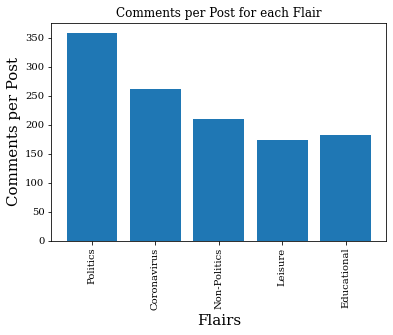

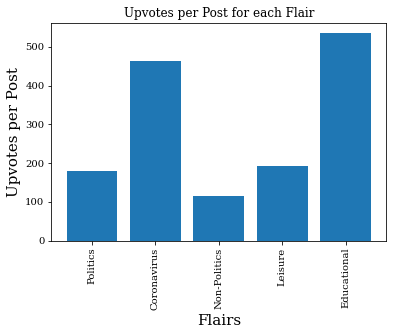

In [9]:
def plot_bar_x(y_axis_val, y_label, title):
    # this is for plotting purpose
    index = np.arange(len(np_flair))
    plt.bar(index, y_axis_val)
    plt.xlabel('Flairs', fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.xticks(index, np_flair, fontsize=10, rotation=90)
    plt.title(title)
    plt.show()
    plt.close()
plot_bar_x(np_comments_per_post, 'Comments per Post', 'Comments per Post for each Flair')
plot_bar_x(np_upvotes_per_post, "Upvotes per Post", "Upvotes per Post for each Flair")